In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("modified_data.csv", index_col=0)
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

# STATISTICAL ANALYSIS

## 1) What factors are significantly related to the number of store purchases?

In [5]:
df_heat = df[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
              'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
              'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
              'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
              'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
              'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Dependents',
              'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].corr().round(3)

In [6]:
# plt.heatmap()
df[["NumStorePurchases", "Income", "NumCatalogPurchases", "NumWebPurchases", "TotalMnt", "TotalPurchases"]].corr()["NumStorePurchases"].sort_values(ascending=False)

NumStorePurchases      1.000000
TotalPurchases         0.820078
TotalMnt               0.675460
Income                 0.628075
NumCatalogPurchases    0.518788
NumWebPurchases        0.502227
Name: NumStorePurchases, dtype: float64

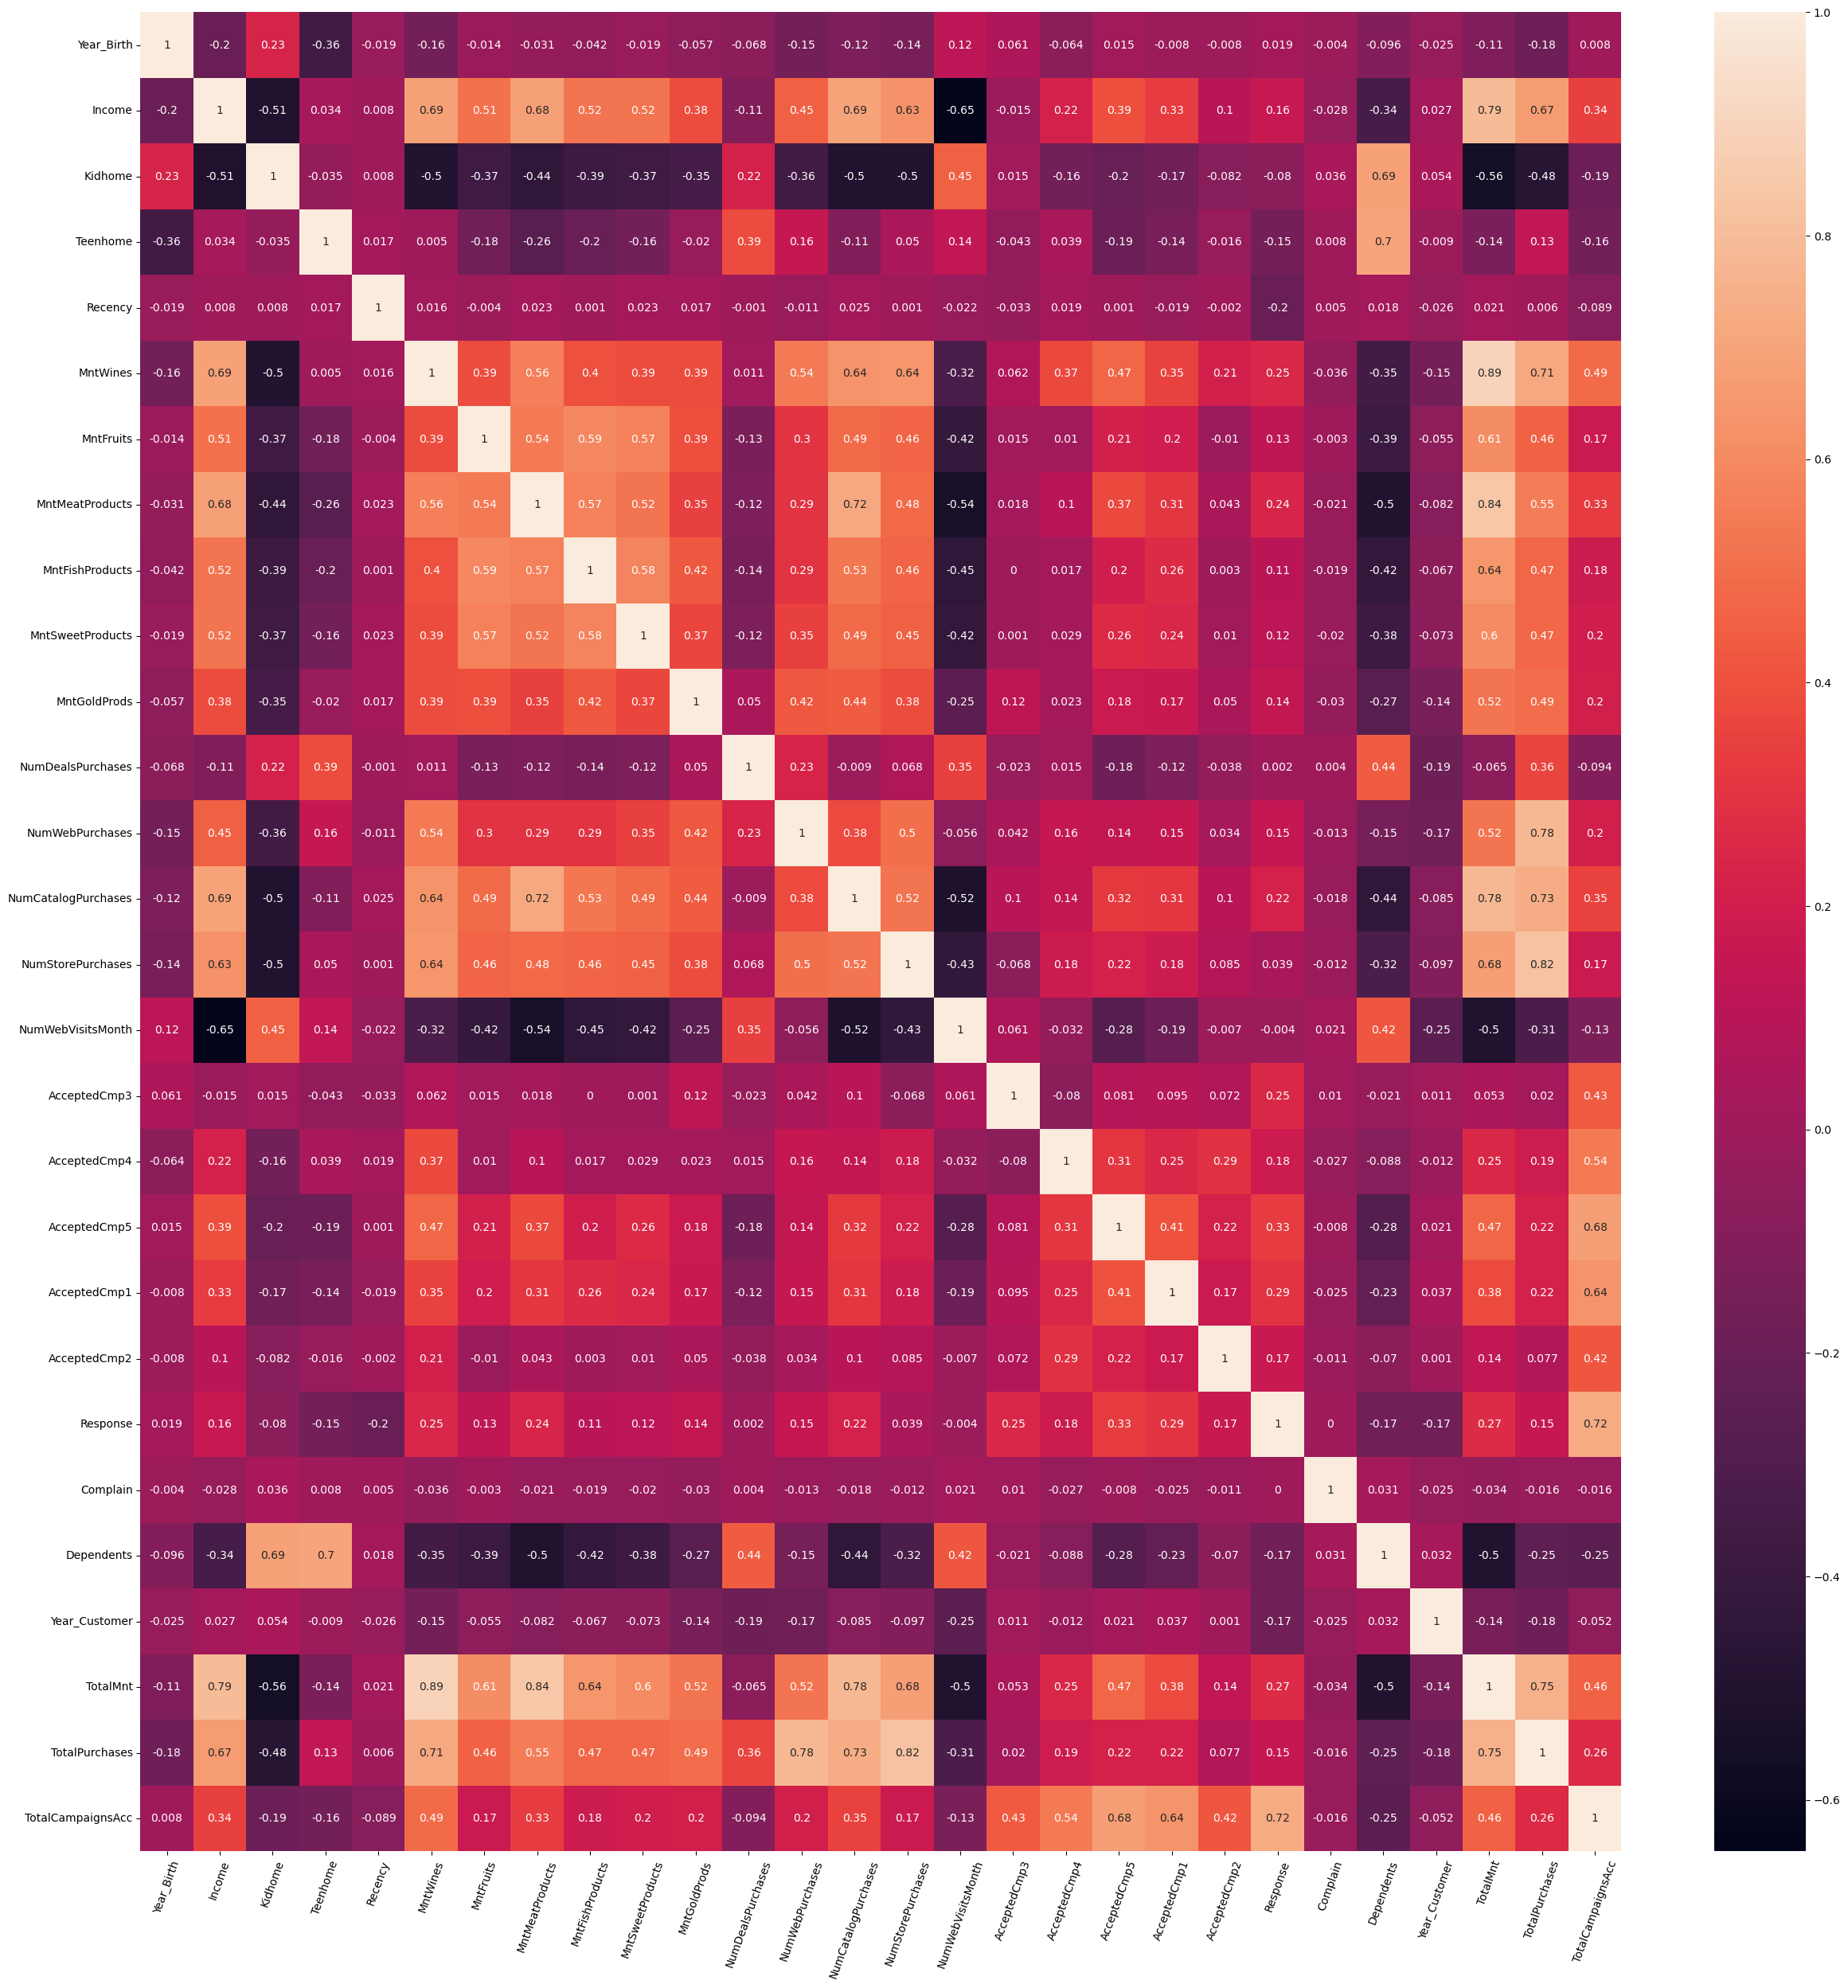

In [7]:
# Let's build a heatmap containing correlations of all the numerical data in our data

plt.figure(figsize=(30, 30))
sns.heatmap(df_heat, annot=True)
plt.xticks(rotation=70)
plt.show()

### As we can see from this heatmap plot, the following factors are related to the number of store purchases:
 - Income
 - NumCatalogPurchases
 - NumWebPurchases
 - TotalMnt
 - TotalPurchases

Those factors positively influence the number of store purchases
### However, we do have a few factors that negatively impact the store purchases such as:
 - Dependents
 - NumWebVisitsMonth

## 2) Does US fare significantly better than the Rest of the World in terms of total purchases?

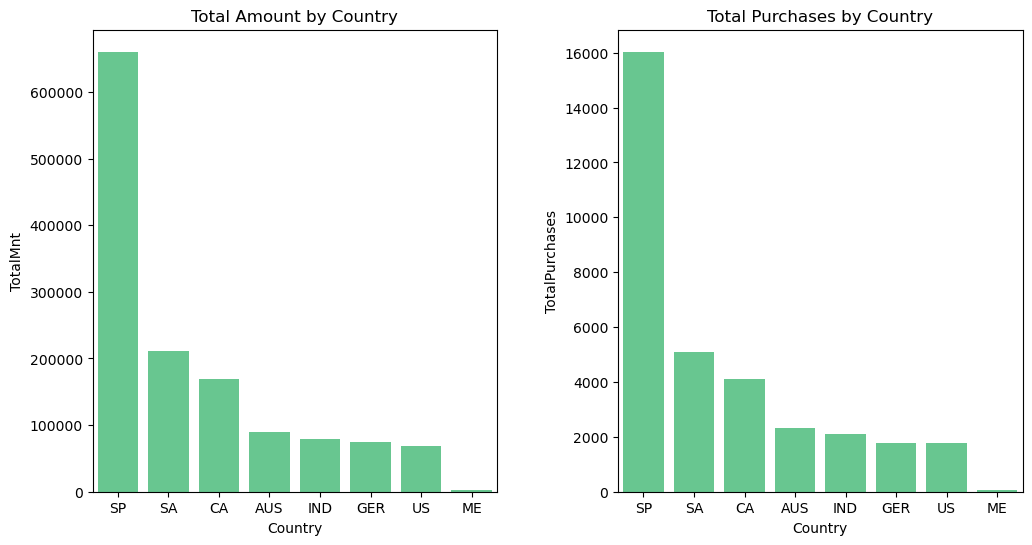

In [10]:
purchase_data = df.groupby("Country")[["TotalPurchases", "TotalMnt"]].sum()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(purchase_data.sort_values(by="TotalMnt", ascending=False), x="Country", y="TotalMnt", color="#58D68D", ax=ax[0])
sns.barplot(purchase_data.sort_values(by="TotalPurchases", ascending=False), x="Country", y="TotalPurchases", color="#58D68D", ax=ax[1])

ax[0].set_title("Total Amount by Country")
ax[1].set_title("Total Purchases by Country")

plt.subplots_adjust(wspace=0.3)

### Conslusion:
We can see that Spain actually has the highest total amount and purchases
US on the other hand is second to last, therefore it does not fare better than the rest of the world in
terms of total purchases and amount

## 3) Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement

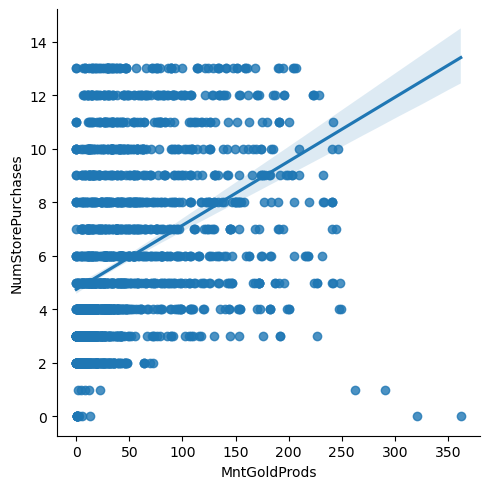

In [13]:
sns.lmplot(df, x="MntGoldProds", y="NumStorePurchases")
plt.show()

In [14]:
temp_df = df[["MntGoldProds", "NumStorePurchases"]]
temp_df["is_above_average"] = temp_df["MntGoldProds"].apply(lambda x: 1 if x > temp_df["MntGoldProds"].mean() else 0)

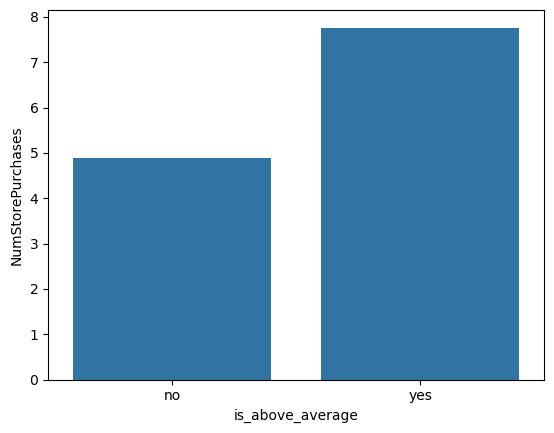

In [15]:
# Plot the average store purchaes number for those who spend less that the average amount
# on gold and those who spend above the average amount on gold

sns.barplot(temp_df.groupby("is_above_average")["NumStorePurchases"].mean())
plt.xticks(ticks=[0, 1], labels=["no", "yes"])
plt.show()

### Conclusion
there is a positive correlation between the amount spent on Gold and the store purchases

## 4) Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish?

                        

In [18]:
df2 = df.copy()
df2["Married_PhD"] = df2["Marital_Status"] + df2["Education"]
df2["Married_PhD"] = df2["Married_PhD"].apply(lambda x: "Married-PhD" if x == 'MarriedPhD' else "other")

<Axes: ylabel='MntFishProducts'>

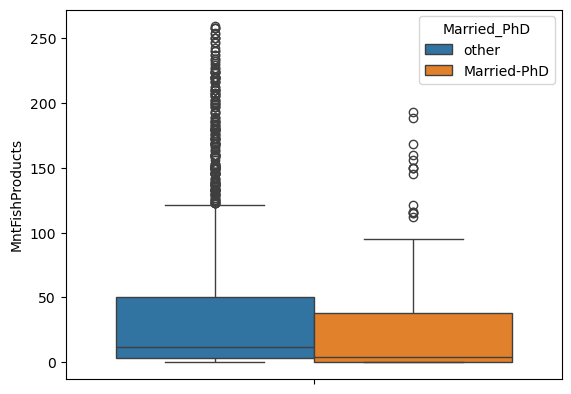

In [19]:
sns.boxplot(
    data=df2,
    y="MntFishProducts",
    hue="Married_PhD"
)

### Conclusion:
Married PhD candidates do not have a significant relation with amount spent on fish

### Factors that are related to amount spent on fish:
- MntFruits
- MntMeatProducts
- MntSweetProducts
- MntGoldProducts
- TotalMnt
- TotalPurchases

## 5) Is there a significant relationship between geographical regional and success of a campaign?

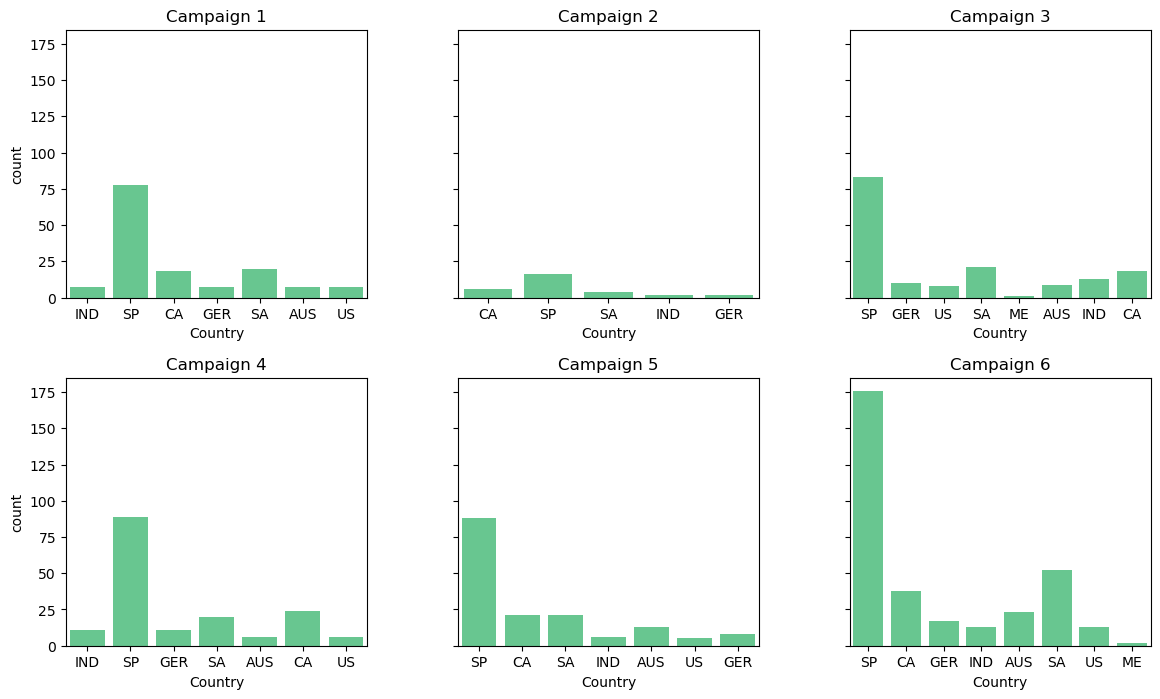

In [46]:
campaigns_cols = sorted([col for col in df.columns if "AcceptedCmp" in col]) + ["Response"]

fig, ax = plt.subplots(2, 3, figsize=(14, 8), sharey=True)

i = j = 0
for col in campaigns_cols:
    sns.countplot(df[df[col] == 1], x="Country", ax=ax[i, j], color="#58D68D")
    if "Cmp" in col:
        ax[i, j].set_title(f"Campaign {col[-1]}")
    else:
        ax[i, j].set_title("Campaign 6")
    j += 1
    if j > 2:
        i+= 1
        j = 0

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.savefig("campaigns.png")

### Conclusion:

We can see from the graphs above that the campaign success heavily depends on the region. Therefore, the regional differences in advertising campaign success are significant